<a href="https://colab.research.google.com/github/harvydavies/LCO-code/blob/main/LCOcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q uncertainties

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import uncertainties.unumpy as unp
import pandas as pd

In [3]:
# Read in the full final main LCO project data

# GitHub CSV file URL
csv_url = 'https://raw.githubusercontent.com/harvydavies/LCO-code/main/mainLCO%20project%20star%20matches.csv'

# Read CSV file into a DataFrame
df = pd.read_csv(csv_url, skiprows = 0)

# Display the DataFrame
print(df)

      NUMBER_1  X_WORLD_1  Y_WORLD_1  XWIN_WORLD_1  YWIN_WORLD_1    X_IMAGE_1  \
0            1  91.697101  24.317994     91.697079     24.317986   120.051544   
1            2  91.686296  23.940858     91.686318     23.940887  2503.764400   
2            3  91.686318  24.122636     91.686314     24.122632  1354.925000   
3            4  91.685363  24.121818     91.685361     24.121814  1360.116500   
4            5  91.686472  24.263281     91.686453     24.263268   466.046300   
...        ...        ...        ...           ...           ...          ...   
3626      6016  92.020638  24.212338     92.020634     24.212339   779.318600   
3627      6019  92.017405  24.146059     92.017374     24.146054  1198.307400   
3628      6021  92.016479  24.171876     92.016467     24.171884  1035.173500   
3629      6023  92.013909  23.903802     92.013859     23.903830  2729.471200   
3630      6025  92.022465  24.175825     92.022510     24.175713  1010.018700   

        Y_IMAGE_1    FLUX_I

In [4]:
print(df.columns)

Index(['NUMBER_1', 'X_WORLD_1', 'Y_WORLD_1', 'XWIN_WORLD_1', 'YWIN_WORLD_1',
       'X_IMAGE_1', 'Y_IMAGE_1', 'FLUX_ISO_1', 'FLUXERR_ISO_1', 'MAG_ISO (V)',
       'MAGERR_ISO (V)', 'FLUX_AUTO_1', 'FLUXERR_AUTO_1', 'FLUX_MAX_1',
       'ISOAREA_IMAGE_1', 'CXX_IMAGE_1', 'CYY_IMAGE_1', 'CXY_IMAGE_1',
       'A_IMAGE_1', 'THETA_IMAGE_1', 'FLAGS_1', 'ELONGATION_1',
       'ELLIPTICITY_1', 'NUMBER_2', 'X_WORLD_2', 'Y_WORLD_2', 'XWIN_WORLD_2',
       'YWIN_WORLD_2', 'X_IMAGE_2', 'Y_IMAGE_2', 'FLUX_ISO_2', 'FLUXERR_ISO_2',
       'MAG_ISO (B)', 'MAGERR_ISO (B)', 'FLUX_AUTO_2', 'FLUXERR_AUTO_2',
       'FLUX_MAX_2', 'ISOAREA_IMAGE_2', 'CXX_IMAGE_2', 'CYY_IMAGE_2',
       'CXY_IMAGE_2', 'A_IMAGE_2', 'THETA_IMAGE_2', 'FLAGS_2', 'ELONGATION_2',
       'ELLIPTICITY_2', 'Separation'],
      dtype='object')


In [5]:
# Slicing out the V,Verr,B and Berr columns

# Slice out the column "MAG_ISO (V)"
Vmag_column = df["MAG_ISO (V)"]

# Display the sliced column
print(Vmag_column)

# Slice out the column "MAGERR_ISO (V)"
Verr_column = df["MAGERR_ISO (V)"]

# Display the sliced column
print(Verr_column)

# Slice out the column "MAG_ISO (B)"
Bmag_column = df["MAG_ISO (B)"]

# Display the sliced column
print(Bmag_column)

# Slice out the column "MAGERR_ISO (B)"
Berr_column = df["MAGERR_ISO (B)"]

# Display the sliced column
print(Berr_column)

0       11.425971
1       15.696349
2       14.606813
3       15.103545
4       16.084814
          ...    
3626    17.735338
3627    14.714099
3628    10.183742
3629    15.700207
3630    17.502200
Name: MAG_ISO (V), Length: 3631, dtype: float64
0       0.001197
1       0.011890
2       0.006192
3       0.008082
4       0.014417
          ...   
3626    0.040451
3627    0.006705
3628    0.000656
3629    0.012171
3630    0.026957
Name: MAGERR_ISO (V), Length: 3631, dtype: float64
0       11.434964
1       15.769723
2       14.623205
3       15.156681
4       16.136606
          ...    
3626    17.852450
3627    14.755794
3628    10.189343
3629    15.764740
3630    17.433414
Name: MAG_ISO (B), Length: 3631, dtype: float64
0       0.001171
1       0.010926
2       0.005911
3       0.007753
4       0.013708
          ...   
3626    0.038525
3627    0.006327
3628    0.000646
3629    0.011322
3630    0.025262
Name: MAGERR_ISO (B), Length: 3631, dtype: float64


In [6]:
#Vtot (Vtotal) = Vmag combined with Verr in an array.
#Btot (Btotal) = Bmag combined with Berr in an array.

Vtot = unp.uarray(Vmag_column,Verr_column)
print(Vtot)

Btot = unp.uarray(Bmag_column,Berr_column)
print(Btot)

BVtot = Btot - Vtot
print(BVtot)

[11.425971+/-0.00119662 15.696349+/-0.011889963 14.6068125+/-0.006191584
 ... 10.183742+/-0.000656 15.700207+/-0.012171079 17.5022+/-0.026957354]
[11.434964+/-0.00117118 15.769723+/-0.010925719 14.623205+/-0.005910563
 ... 10.1893425+/-0.000646 15.76474+/-0.01132239 17.433414+/-0.0252622]
[0.00899300000000025+/-0.0016743840708750186
 0.07337400000000116+/-0.016147524757941387
 0.016392500000000254+/-0.008559817019424248 ...
 0.005600499999999897+/-0.0009206801833427284
 0.06453299999999906+/-0.01662322710355426
 -0.06878599999999935+/-0.0369442510212525]


In [7]:
# Extract array of just the values
BVmag = np.array([val.nominal_value for val in BVtot])

# Display the values array
print("Values array:", BVmag)

# Extract array of just the errors
BVerr = np.array([val.std_dev for val in BVtot])

# Display the errors array
print("Errors array:", BVerr)

Values array: [ 0.008993   0.073374   0.0163925 ...  0.0056005  0.064533  -0.068786 ]
Errors array: [0.00167438 0.01614752 0.00855982 ... 0.00092068 0.01662323 0.03694425]


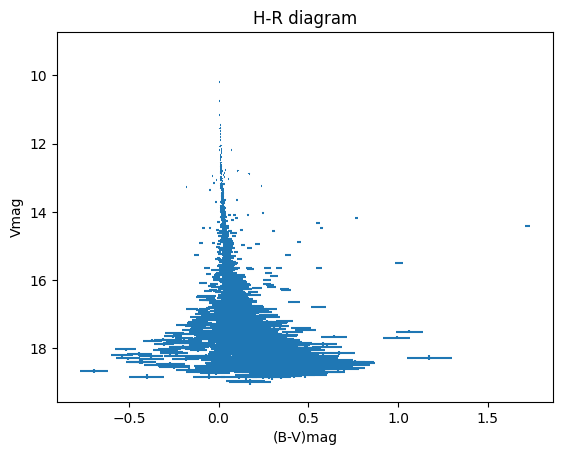

In [12]:
plt.errorbar(BVmag,Vmag_column, xerr = BVerr, yerr = Verr_column, linestyle='')

# Setting the y-axis range from 24 to 12
#plt.ylim(22, 16)
#plt.xlim(-0.5, 1.5)

# Adding labels and title
plt.xlabel('(B-V)mag')
plt.ylabel('Vmag')
plt.title('H-R diagram')

# Flip the y-axis
plt.gca().invert_yaxis()

# Display the plot
plt.show()

In [ ]:
# Read in isochronedata.csv from github

# GitHub CSV file URL
csv_url = 'https://raw.githubusercontent.com/harvydavies/LCO-code/main/isochronedata.csv'

# Read CSV file into a DataFrame
iso = pd.read_csv(csv_url, skiprows = 13)

# Display the DataFrame
print(iso)